## Import Libraries

2023-11-14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Import Dataset

In [2]:
data = pd.read_csv('E:\\Documents\\සසිඳු චානක පියුමාල්\\Acadamic Propoces\\Msc\\Sem 1\\Scientiific writting & communication\\diwali_sales_data.csv', encoding='ISO-8859-1')

In [3]:
sales_df = pd.DataFrame(data)

In [4]:
sales_df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## Data preprocessing

In [51]:
sales_df.max.group_by('Zone')

AttributeError: 'function' object has no attribute 'group_by'

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [6]:
sales_df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### Only Amount column has null Values.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


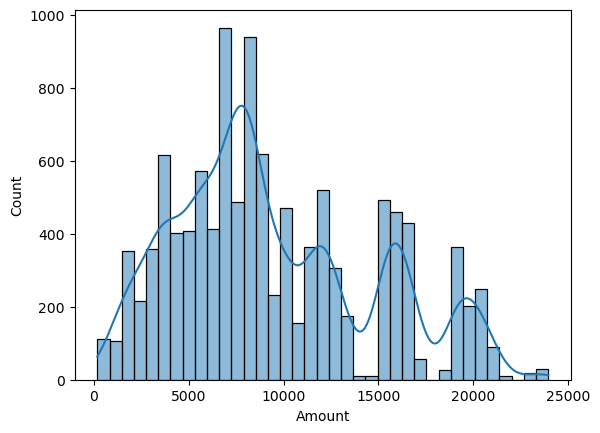

In [7]:
sns.histplot(sales_df['Amount'], kde=True)
plt.show()

#### According to histplot, there isn't normal distribution on Amount data. Then, the null values was dropped.

In [8]:
sales_df = sales_df.dropna(subset=['Amount'])

### Visualize the unique values of each column.

In [10]:
for col in sales_df.columns:
    print(col,'--->',sales_df[col].unique())

User_ID ---> [1002903 1000732 1001990 ... 1001542 1004378 1005258]
Cust_name ---> ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
Product_ID ---> ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
Gender ---> ['F' 'M']
Age Group ---> ['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']
Age ---> [28 35 16 25 26 34 20 24 29 54 19 46 30 53 83 33 40 39 32 36 55 27 72 45
 43 47 22 52 18 21 38 37 23 49 42 50 48 31 44 41 66 15 51 77 87 79 71 88
 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 61 91 85
 70 80 65 74 69 78 57 60 59]
Marital_Status ---> [0 1]
State ---> ['Maharashtra' 'Andhra Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana'
 'Madhya Pradesh' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
Zone ---> ['Western' 'Southern' 'Central' 'Northern' 'Eastern']
Occupation ---> ['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Ba

### EDA Using Plotnine

In [12]:
from plotnine import *

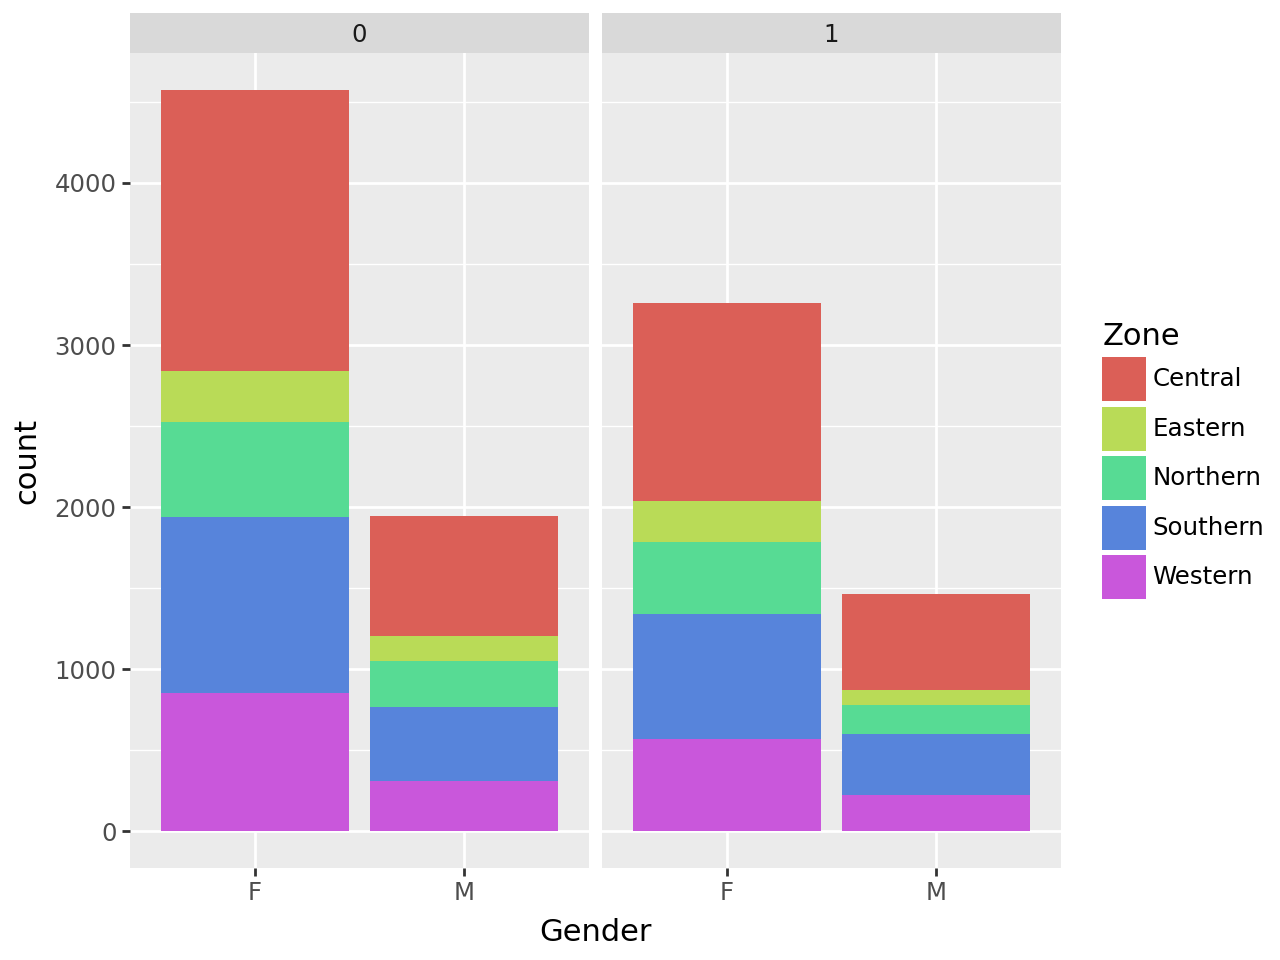

In [42]:
ggplot(sales_df)+aes(x='Gender',fill ='Zone')+ geom_bar()+facet_wrap('Marital_Status')

### According to above graph,The information about number of customers according to gender, zone,and Marital Status can be gatherd. Female customers are greater than male customers and most of them are unmarried. Most of the customers from central zone and most of them are unmarried females. Least of customers from easten zone and most of them are also unmarried females. The  married males have low trend to shop.  Number of customers decreases from each zone as Central, Southern, Western, Northern and Eastern respectively.

In [ ]:
ggplot(sales_df)+aes(x='Zone',fill ='Zone')+ geom_bar()

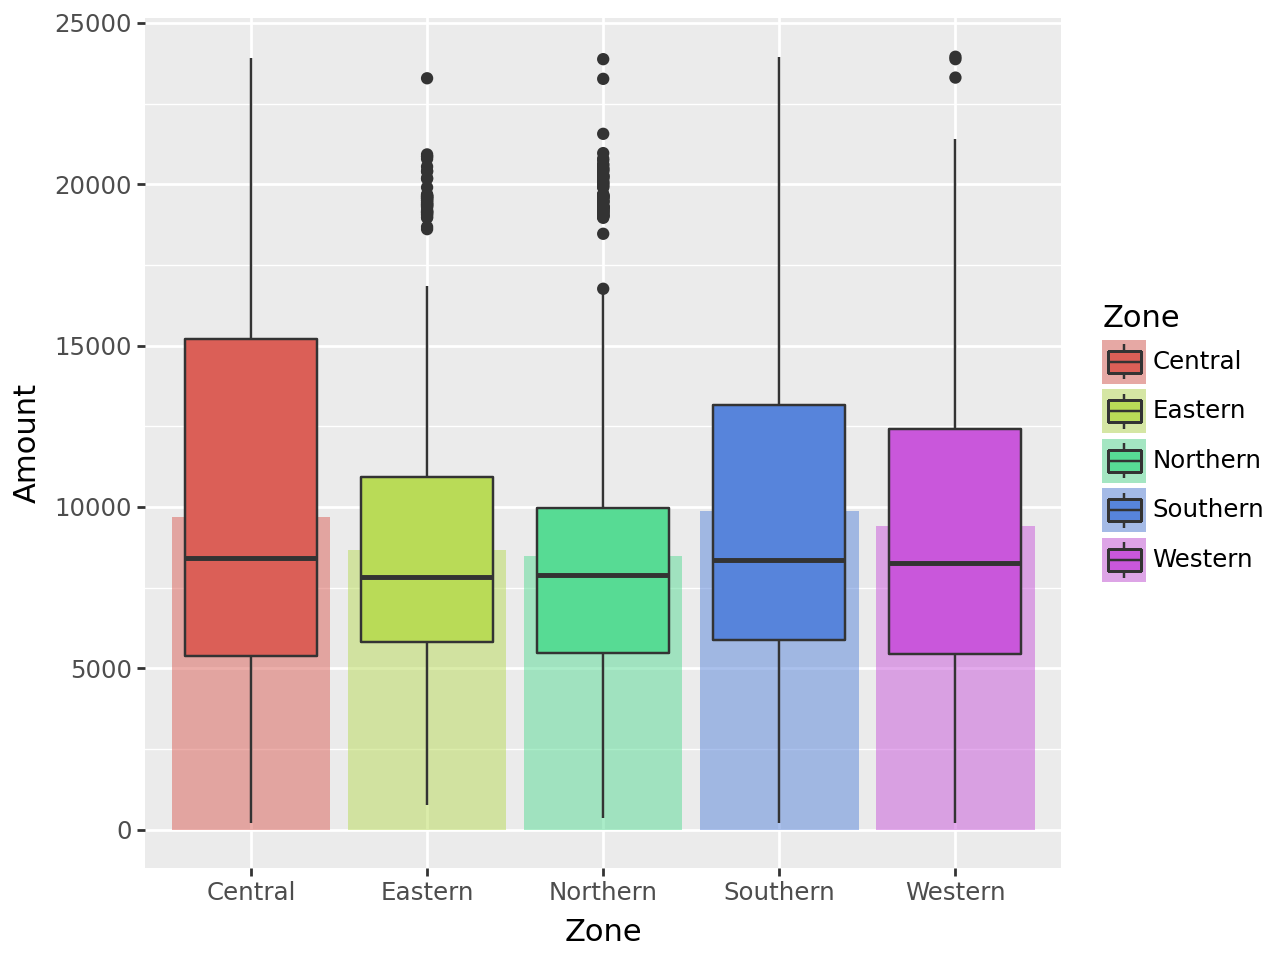

In [17]:
ggplot(sales_df)+aes(x='Zone',y='Amount',fill ='Zone')+geom_col(aes(fill='Zone'),stat='summary',fun_y=np.mean, alpha=0.5)+ geom_boxplot()

### According to above graph , Shows how customers spend money from each zone. The middle line of the box plots represent the median amount that customers spend. The box represent inter quatile range of  the amounts from each zone. The height of the bars with light color represent the mean amount of each zone. The heighest mean amount from Southern and the lowerst from Northern. In the central zone spending range is higher than others.

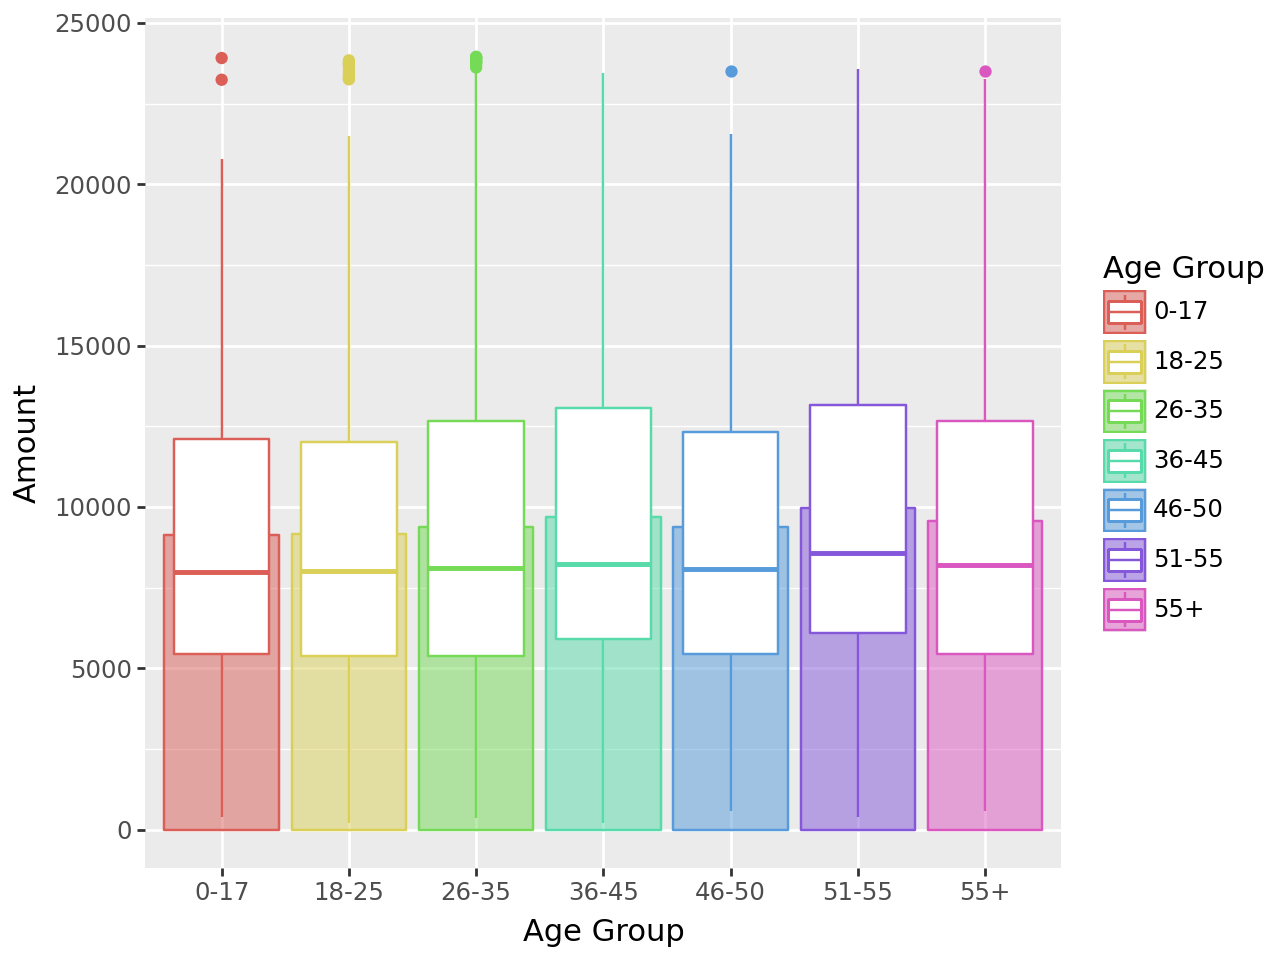

In [15]:
ggplot(sales_df)+aes(x='Age Group',y='Amount',color ='Age Group')+geom_col(aes(fill='Age Group'),stat='summary',fun_y=np.mean, alpha=0.5)+ geom_boxplot()

### According toabove graph, Shows how customers spend money according to age group. Here, The box represent inter quatile range of the amounts from each age group. The height of the bars with light color represent the mean amount of each age group. The costumers in age group between 51 to 55 has spent more money than others. The age between 0 to 17 has spent the lowerst. 

C:\Users\LENOVO\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


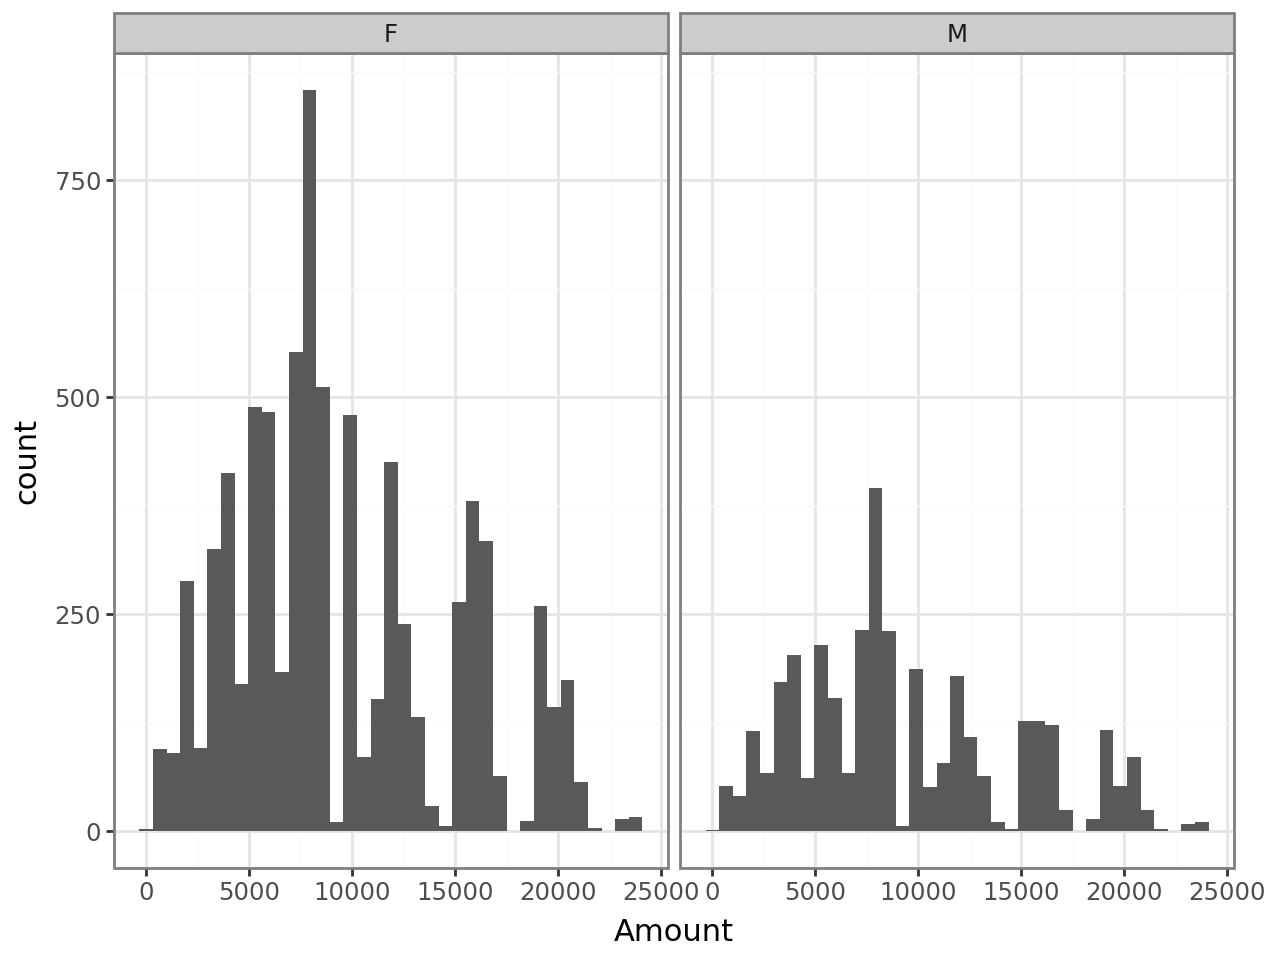

In [21]:
ggplot(sales_df)+theme_bw()+ geom_histogram(mapping = aes(x = 'Amount'))+facet_wrap('Gender')

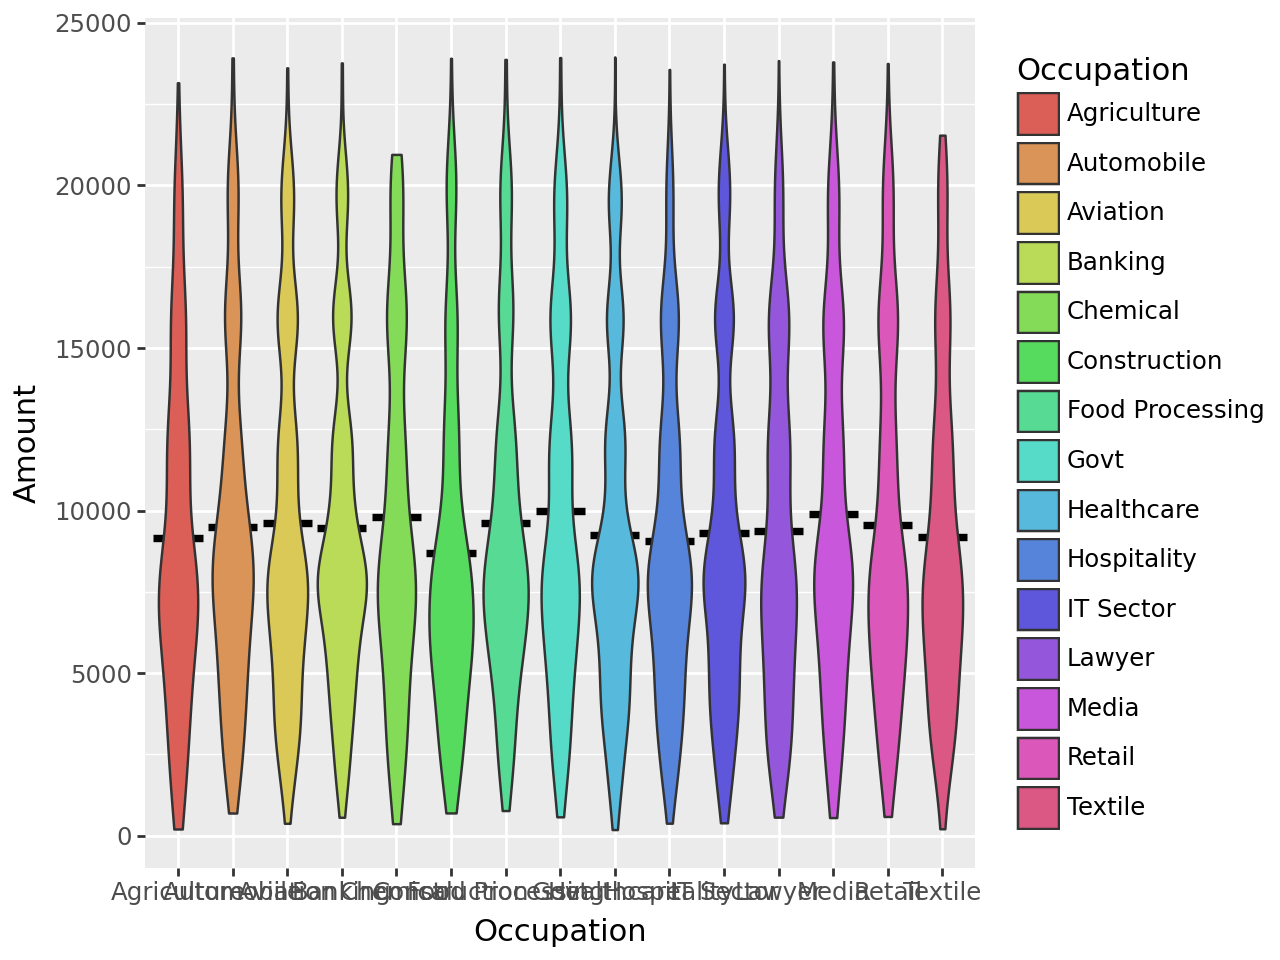

In [30]:
ggplot(sales_df)+aes(x='Occupation',y='Amount',fill ='Occupation') + geom_segment(aes(x=stage('Occupation',after_stat='x-.45'),xend=stage("Occupation", after_stat="x+.45"),yend=after_stat("y"),),stat="summary",fun_y=np.mean,color="black",size=1.5)+ geom_violin()

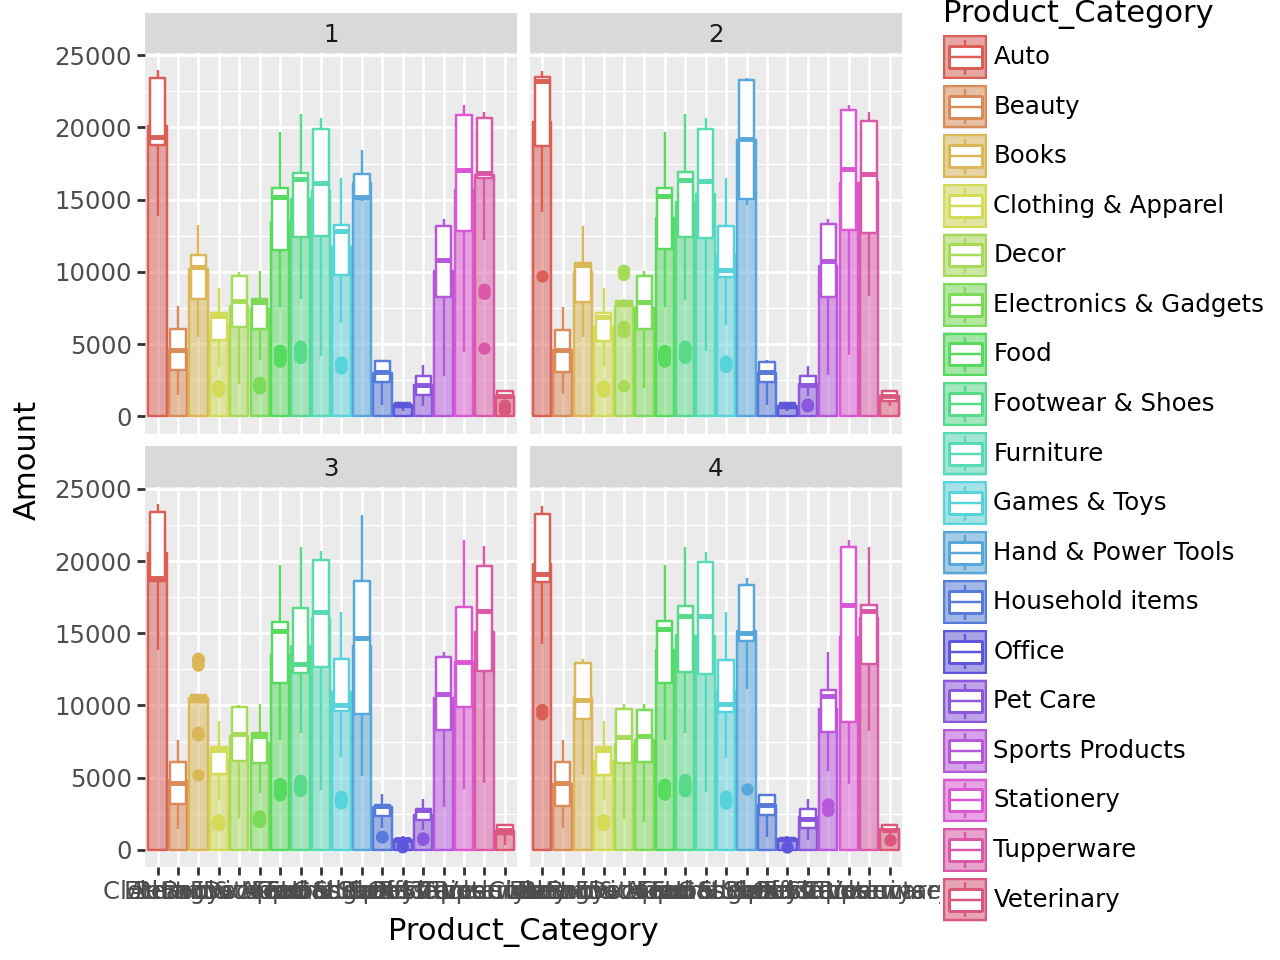

In [44]:
ggplot(sales_df)+aes(x='Product_Category',y='Amount',color ='Product_Category')+geom_col(aes(fill='Product_Category'),stat='summary',fun_y=np.mean, alpha=0.5)+ geom_boxplot()+facet_wrap('Orders')

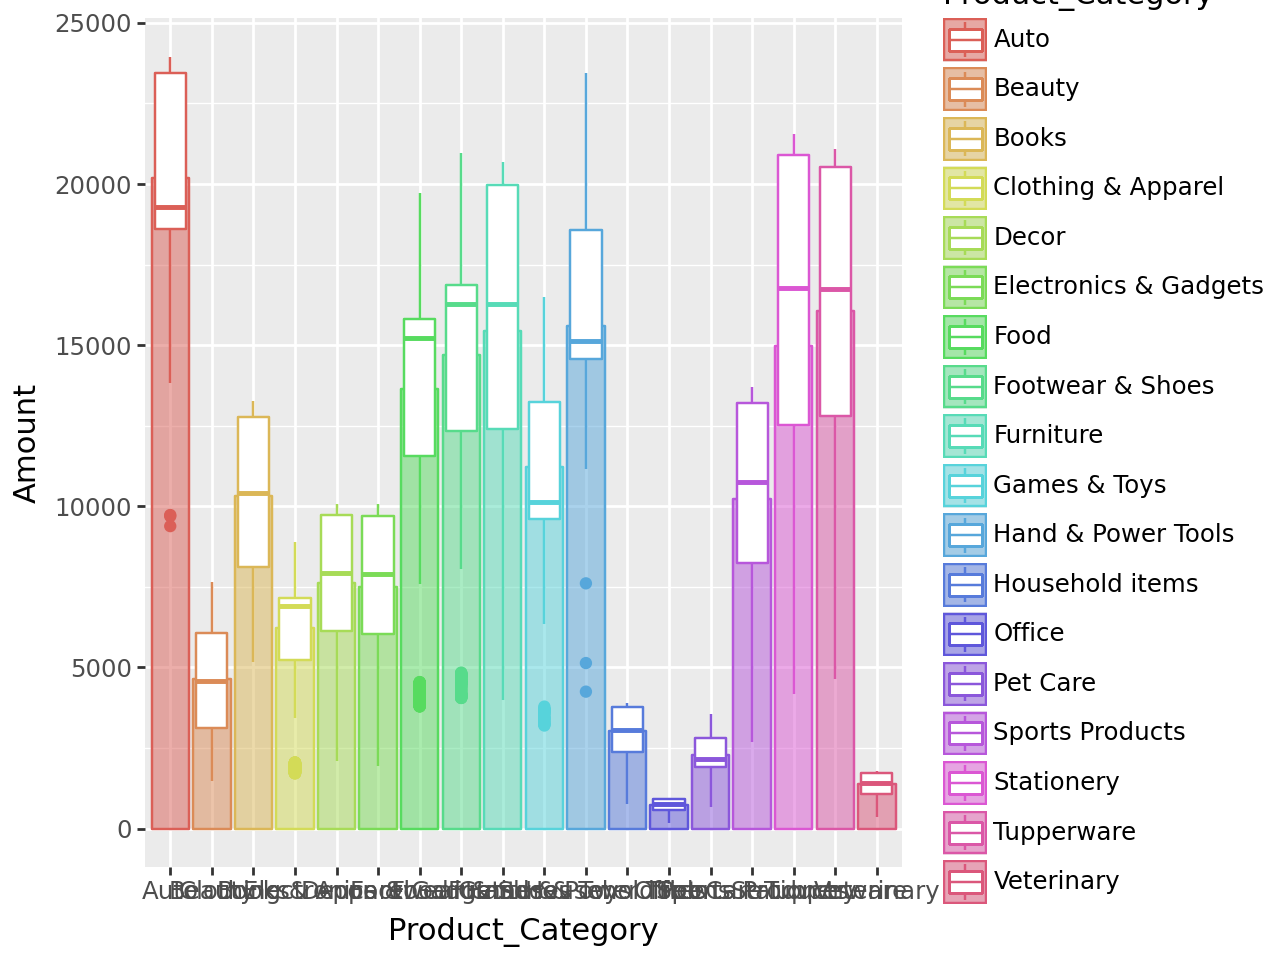

In [45]:
ggplot(sales_df)+aes(x='Product_Category',y='Amount',color ='Product_Category')+geom_col(aes(fill='Product_Category'),stat='summary',fun_y=np.mean, alpha=0.5)+ geom_boxplot()